# Star Wars Survey

In this project we will be analysing the results from a survey of star wars fans using the online tool SurveyMonkey. The team FiveThirtyEight ran this survey to answer the question **"does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**. They received 835 total responses, the dataset has been made available from [their GitHub respository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including:

| Column Name                                                              | Description                                                    |
|--------------------------------------------------------------------------|----------------------------------------------------------------|
| RespondentID                                                             | An anonymized ID for the respondent (person taking the survey) |
| Gender                                                                   | The respondent's gender                                        |
| Age                                                                      | The respondent's age                                           |
| Household Income                                                         | The respondent's income                                        |
| Education                                                                | The respondent's education level                               |
| Location (Census Region)                                                 | The respondent's location                                      |
| Have you seen any of the 6 films in the   Star Wars franchise?           | Has a Yes or No response                                       |
| Do you consider yourself to be a fan of   the Star Wars film franchise?  | Has a Yes or No response                                       |

There are several other columns containing answers to questions about the *star wars* movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

The first step is to import all of our dependencies and then read the dataset into a DataFrame. It's important to note that the encoding of the dataset is "ISO-8859-1" which is not the the default UTF-8, therefore we must specify the encoding when reading the dataset. After reading the dataset, we will inspect the first and last few columns to get an idea of our dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('mode.chained_assignment', None)
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


We were able to successfully read the dataset into a DataFrame. Upon inspection, we notice we need to clean many aspects of our dataset into a usable form before we can begin analysing the data. Next we will review the names of the columns.

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The RespondentID is supposed to be unique for every each respondent, therefore it should not contain any blank values. We will remove any rows with an invalid RespondentID.

In [3]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape

(1186, 38)

There was only one row which had an invalid RespondentID, which was the first row of our dataset, which seems to be a prompt for the user to respond.

## Cleaning and Mapping Yes/No Columns

Next we will convert the Yes/No columns into True/False values. To do this we will be writing a function to apply to the column. First we need to check whether the columns contains any blanks, so that our function accomodates for the blanks by preserving them

In [4]:
print(f"Number of nulls in column 1: {star_wars[star_wars.columns[1]].isnull().sum()}")
print(f"Number of nulls in column 2: {star_wars[star_wars.columns[2]].isnull().sum()}")

Number of nulls in column 1: 0
Number of nulls in column 2: 350


While there are no blanks in the "Have you seen any of the 6 films in the Star Wars franchise?" column, there are 350 blanks in the "Do you consider yourself to be a fan of the Star Wars film franchise?" column. We will write a function to convert yes into True, no into False and blank values as blank values.

In [5]:
def yes_no_clean(s):
    if s == "Yes":
        return True
    elif s == "No":
        return False
    else:
        return np.nan

star_wars[star_wars.columns[1]] = star_wars[star_wars.columns[1]].apply(yes_no_clean)
star_wars[star_wars.columns[1]].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars[star_wars.columns[2]] = star_wars[star_wars.columns[2]].apply(yes_no_clean)
star_wars[star_wars.columns[2]].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

Before we clean the checkbox columns, we will rename these checkbox columns to a more intuitive name for later. The columns represents whether or not the respondent has seen the respective star wars episodes starting from episode 1. So we will rename the columns to seen_$x$ where $x$ is the episode number.

The dataset has represented a tick in the checkbox by duplicating the value which was originally in row 1, and the blanks represents an unchecked tickbox. We will convert blanks into False, and non-blanks into True. For simplicity, we will use a lambda function rather than defining an entire function for this basic functionality.

In [7]:
col_to_rename = star_wars.columns[3:9]
col_renamed_to = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
mapping_dict = {col_to_rename[x]:col_renamed_to[x] for x in range(6)}
star_wars.rename(mapping_dict, axis=1, inplace=True)
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [8]:
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].applymap(lambda s: False if pd.isnull(s) else True)
star_wars[star_wars.columns[3:9]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
...,...,...,...,...,...,...
1182,True,True,True,True,True,True
1183,True,True,True,True,True,True
1184,False,False,False,False,False,False
1185,True,True,True,True,True,True


## Cleaning the Ranking Columns

Before we clean the ranking columns, we will rename these ranking columns to a more intuitive name for later. The columns represents the ranking the respondent has given to respective star wars episodes starting from episode 1. So we will rename the columns to ranking_$x$ where $x$ is the episode number. The rating is ranking each of the episodes from worst to best, with 1 representing the best and 6 representing the worst.

Each of the value in the columns either contains a number from 1 to 6, so all we have to do is cast the value as a float.

In [9]:
col_to_rename = star_wars.columns[9:15]
col_renamed_to = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
mapping_dict = {col_to_rename[x]:col_renamed_to[x] for x in range(6)}
star_wars.rename(mapping_dict, axis=1, inplace=True)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4.0,3.0,6.0,5.0,2.0,1.0


## Finding the Highest-Ranked Movie

Now that we have cleaned up the data, we can find the higest ranked movie. We will find the mean of each of hte ranking columns and then plot this as a bar chart for a quick and intuitive visual analysis. It is important to note that a low is good and high is bad.

<AxesSubplot:>

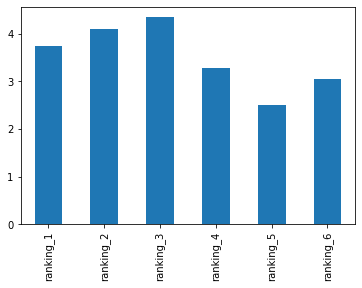

In [10]:
star_wars[star_wars.columns[9:15]].mean().plot(kind='bar')

The results of the survey shows that Star Wars Episode 5 had the best rankings as predicted by FiveThirtyEight who ran the survey, and Star Wars Episode 3 was ranked the worst. Another obersvation is that respondents ranks the original trilogy higher than the prequal trilogy.


## Finding the Most Viewed Movie

Next we will analyse the most viewed Star Wars movies. One thing to keep in mind is that the Star Wars movies were released starting Episode 4 to Episode 6 which is the original trilogy, then Episode 1 to 3 which is the prequal trilogy.

<AxesSubplot:>

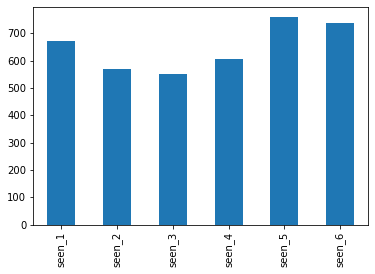

In [11]:
star_wars[star_wars.columns[3:9]].sum().plot(kind='bar')

The views peaked at Episode 5 and bottomed out at Episode 3. 

The views and ranking plots also shows the overall interest respondent throughout the Star Wars franchise. Starting with a modest interest when the series began with Episode 4 then peaking at Episode 5 and Episode 6 kept that momentum going. While there were initially high hopes for Episode 1, it did not meet fan's expectations. This pattern follows for the remainder of the prequal trilogy, resulting in a decline in views and rankings.  

## Exploring the Data by Bineary Segments

Next we will explore results by segments to see how each segment responded to the Star Wars movies. We will explore the results by Gender, whether the respondent considerst themselves a Star Wars fan and whether the respondent considers themselves a Star Trek fan. It's important to note that if one segments has more participants than the other, this would skew the overall views to that particular segement. Rather than comparing the overall views, we will compare the proportion of respondent who watched a particular movie, this way uneven participants within the segment won't interfere withe the results.

In [12]:
males = star_wars[star_wars[star_wars.columns[-5]] == "Male"]
females = star_wars[star_wars[star_wars.columns[-5]] == "Female"]
true_st_fans = star_wars[star_wars[star_wars.columns[-6]] == 'Yes']
not_st_fans = star_wars[star_wars[star_wars.columns[-6]] == 'No']
star_wars[star_wars.columns[2]] = star_wars[star_wars.columns[2]].astype(str)
true_sw_fans = star_wars[star_wars[star_wars.columns[2]] == 'True']
not_sw_fans = star_wars[star_wars[star_wars.columns[2]] == 'False']

<AxesSubplot:title={'center':'Male vs. Females Proportion Watched'}>

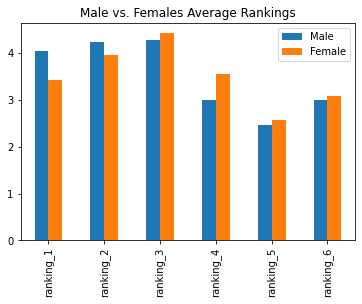

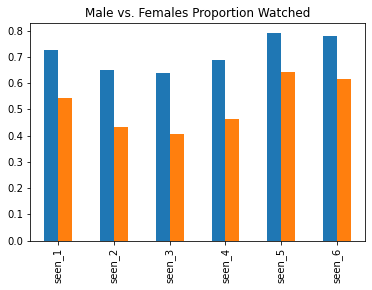

In [13]:
gender_ratings = males[males.columns[9:15]].mean().to_frame(name='Male')
gender_ratings['Female'] = females[females.columns[9:15]].mean()
gender_views = males[males.columns[3:9]].mean().to_frame(name='Male')
gender_views['Female'] = females[females.columns[3:9]].mean()
gender_ratings.plot(kind='bar', title="Male vs. Females Average Rankings")
gender_views.plot(kind='bar', legend=False, title="Male vs. Females Proportion Watched")

Both genders follows the same pattern the average rankings, suggesting both genders agree with the overall rankings of the Star Wars movies. However, male's rankings are much more controversial than the female rankings, especially between the ranking between the original trilogy and the prequal trilogy. This suggests that males holds a much stronger opinion on the overall Star Wars franchise compared to females.

Both genders follows the same patterns for proportion viewed as well. Males dominates in the proportion of views for every episode, which is unsurprising as the science fiction genre attracts mainly a male demographic.

<AxesSubplot:title={'center':'Star War Fans vs. Non-Fans Proportion Watched'}>

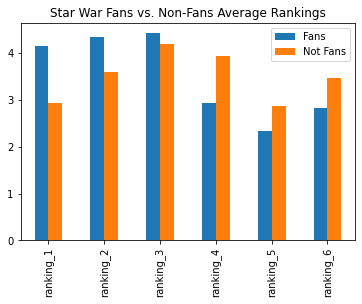

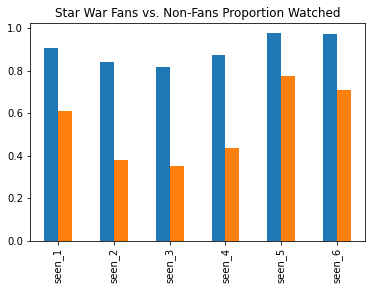

In [14]:
sw_fans_ratings = true_sw_fans[true_sw_fans.columns[9:15]].mean().to_frame(name='Fans')
sw_fans_ratings['Not Fans'] = not_sw_fans[not_sw_fans.columns[9:15]].mean()
sw_fans_views = true_sw_fans[true_sw_fans.columns[3:9]].mean().to_frame(name='True Star War Fans')
sw_fans_views['Not Fans'] = not_sw_fans[not_sw_fans.columns[3:9]].mean()
sw_fans_ratings.plot(kind='bar', title="Star War Fans vs. Non-Fans Average Rankings")
sw_fans_views.plot(kind='bar', title="Star War Fans vs. Non-Fans Proportion Watched", legend=False)

There is a strong consensus within the Star Wars fans where they have ranked the original trilogy over the prequal trilogy. This cannot be said for the non Star Wars fans, where they have ranked Episode 1 very close to Episode 5. 

Unsurprisingly, there is a very higher proportion of fans who watched every episode of Star Wars compard to non-fans. Surprisingly, for non-fans, there is a higher proportion who watched the Episode 1 compared to Episode 4. This explains the spike in ratings for Episode 1 as the respondent is more likely to rank a particular episode higher if they have seen that movie.

<AxesSubplot:title={'center':'Star Trek Fans vs. Non-Fans Proportion Watched'}>

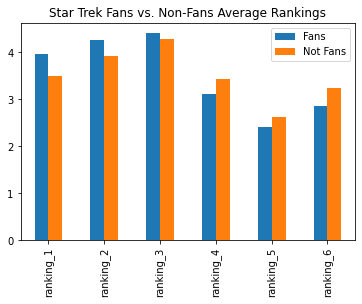

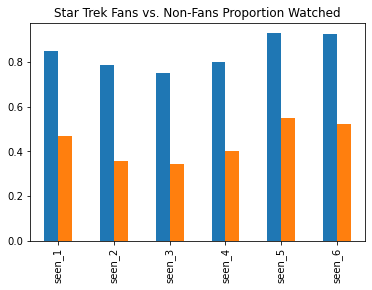

In [15]:
st_fans_ratings = true_st_fans[true_st_fans.columns[9:15]].mean().to_frame(name='Fans')
st_fans_ratings['Not Fans'] = not_st_fans[not_st_fans.columns[9:15]].mean()
st_fans_views = true_st_fans[true_st_fans.columns[3:9]].mean().to_frame(name='True Star Trek Fans')
st_fans_views['Not Fans'] = not_st_fans[not_st_fans.columns[3:9]].mean()
st_fans_ratings.plot(kind='bar', title="Star Trek Fans vs. Non-Fans Average Rankings")
st_fans_views.plot(kind='bar', title="Star Trek Fans vs. Non-Fans Proportion Watched", legend=False)

We see that both Star Trek and non Star Trek fans tends follows similar patterns in ranking the Star Wars movies as well as the proportion whom watched those movies. However a higher proportion Star Trek fans watched the each of the Star Wars movies.

# Conclusion

The data from the survey proves that Star Wars Episode 5: The Empire Strikes Back is the best rated Star Wars film as well as the most watched out of all of the respondents of this survey. These results holds true across different genders and across Star Wars fans and non-fans alike. 